In [ ]:
# Today, AI is everywhere, we are able to do many things with it.
# I will be exploring one of the key areas within AI, classification, which is a field currently under research, and we have not fully yet found out the limitations
# We've trained AI which can classify animals, plants, cars, and medicine, among other things.
# However, the main problem in hand revolves around the AI's capability to effectively classify manipulated images and the extent of training required to enable the AI to reliably detect these altered images.
# This is where the AI is most vulnerable as it is not able to adapt quickly to evolving image manipulation techniques and this is what I will be aiming to research and come to a solution where I aim to see how easily I can manipulate the AI into classifying the hacked images.
# Dogs and Cats Dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteHBX27X/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/20
582/582 [==============================] - 75s 115ms/step - loss: 0.6997 - accuracy: 0.5532 - val_loss: 0.6916 - val_accuracy: 0.5718
Epoch 2/20
582/582 [==============================] - 63s 108ms/step - loss: 0.6530 - accuracy: 0.6160 - val_loss: 0.6386 - val_accuracy: 0.6346
Epoch 3/20
582/582 [==============================] - 65s 111ms/step - loss: 0.6226 - accuracy: 0.6517 - val_loss: 0.6062 - val_accuracy: 0.6681
Epoch 4/20
582/582 [==============================] - 67s 115ms/step - loss: 0.5935 - accuracy: 0.6831 - val_loss: 0.5845 - val_accuracy: 0.7042
Epoch 5/20
582/582 [==============================] - 67s 115ms/step - loss: 0.5507 - accuracy: 0.7182 - val_loss: 0.5585 - val_accuracy: 0.7180
Epoch 6/20
582/582 [==============================] - 68s 116ms/step - loss: 0.5132 - accuracy: 0.7436 - val_loss: 0.5238 - val_accuracy: 0.75

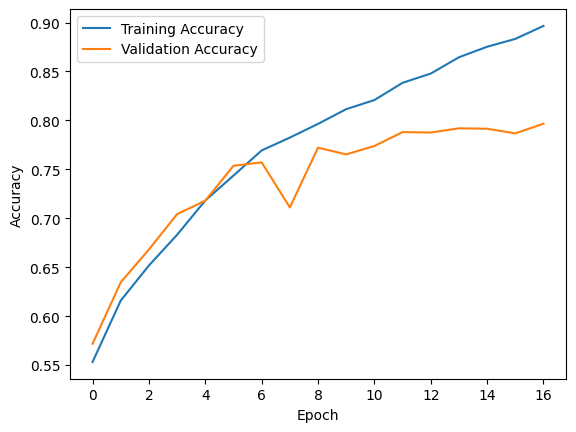

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    image = tf.image.random_hue(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)
batch_size = 32
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Here is my attempt to classify correctly, which I have been able to do because I fine tuned the model, as we know we are never able to get 1OO% test accuracy so the model will never be 1OO% accurate, so we are able to get good results in this model which is showing that it can classify correctly


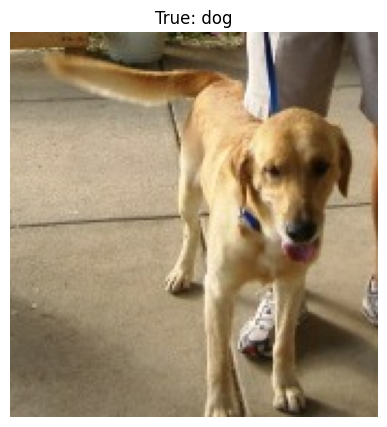

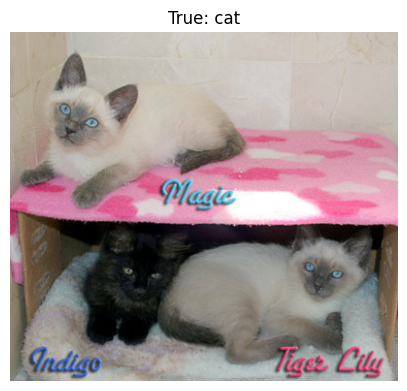

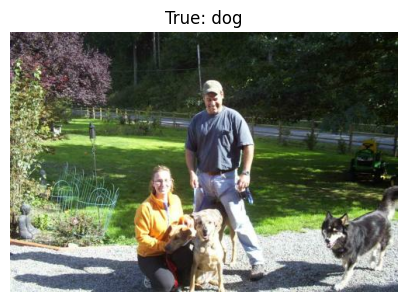

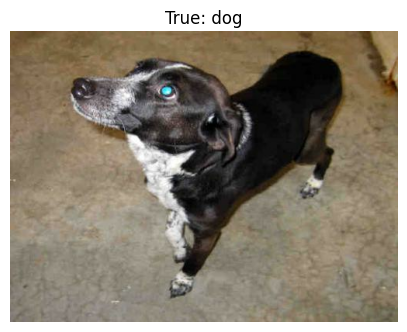

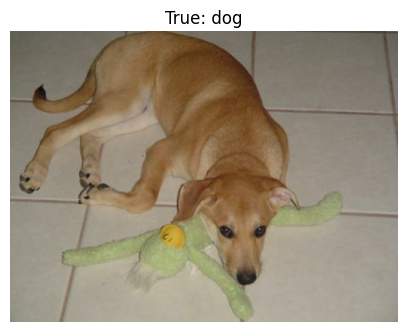

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
(train_ds, test_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)
def display_images(dataset, num_images=5):
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.figure(figsize=(5, 5))
        plt.imshow(image.numpy().astype(np.uint8))
        plt.title(f"True: {info.features['label'].int2str(label.numpy())}")
        plt.axis('off')
        plt.show()
display_images(test_ds)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>